# Computer Book A, Activities 42

This activity is related to the **Poisson process,** so we are working with the Poisson and exponential distributions.

- Calculating probabilities
- Plotting the p.m.f. of a Poisson distribution
- Plotting the p.d.f. of an exponential distribution

## Package import and distribution declarations

In [1]:
from scipy.stats import poisson, expon
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

## Declare the distributions

We are given the rate `r` as 0.517/s.

In [2]:
r = 0.517  # rate, per second

# ============================================================================
# Number of events
# ================
# Questions involve number of events per minute, so scale r using rt
# where t=60 (60s in 1min).
#
# There is no need to scale r for the waiting time
# ============================================================================

x = poisson(mu=r*60)

# ============================================================================
# Waiting time between events
# ===========================
# There is no need to scale r for the waiting time
# ============================================================================

t = expon(loc=0, scale=1/r)  # scale = sd

## Number of events

In [3]:
# calculate P(X=30)
x.pmf(k=30)

0.07141326687104596

In [4]:
# calculate P(X<20) = F(19)
x.cdf(x=19)

0.014289920912386095

In [5]:
# Method 1. calculate P(X>=50) = 1 - F(49)
1 - x.cdf(x=49)

0.001040963952770979

In [6]:
# Method 2. calculate P(X>=50) = 1 - F(49) using sf()
x.sf(x=49)

0.0010409639527710086

## Waiting time between events

In [7]:
# calculate P(T<0.5)
t.cdf(x=0.5)

0.22779096895081516

In [8]:
# Method 1. calculate P(T>0.3) = 1 - F(0.3)
1 - t.cdf(x=0.3)

0.8563295402477983

In [9]:
# Method 2. calculateP(T>0.3) using sf()
t.sf(x=0.3)

0.8563295402477983

## Plot the distributions

### Plot of number of events

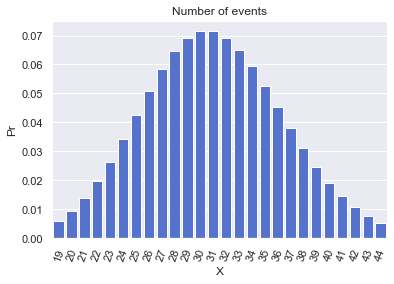

In [10]:
f, ax = plt.subplots()

# range of X: 0.01 - 0.99 quantiles
elem = np.arange(x.ppf(0.01),
                 x.ppf(0.99))

# plot the distribution
sns.barplot(x=elem.astype("int"),  # recast np.array as int
            y=x.pmf(k=elem),  # calculate Pr of each elem
            color="royalblue")

ax.set(title="Number of events",
       xlabel="X",
       ylabel="Pr")

plt.xticks(rotation=70)

plt.show()

### Plot of waiting time between events

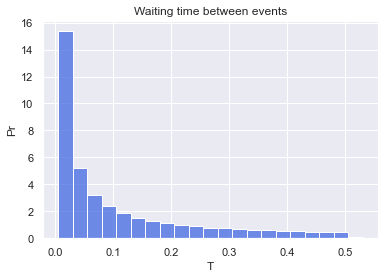

In [11]:
f, ax = plt.subplots()

# range of T: 0.01 - 0.99 quantiles
elem = np.linspace(t.ppf(0.01),
                   t.ppf(0.99),
                   num=1000)

# plot the distribution
sns.histplot(x=t.pdf(elem),
             color="royalblue",
             binwidth=0.025,
             stat="density")

ax.set(title="Waiting time between events",
       xlabel="T",
       ylabel="Pr")

plt.show()